In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds


# Step 1: Load MovieLens 100k data from file or URL
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=column_names)

# Create a pivot table (user-item matrix) for ratings
ratings_matrix = df.pivot(index='user_id', columns='item_id', values='rating')
 

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
 
# Step 3: Identify non-NA entries in the ratings matrix
non_na_mask = ratings_matrix.notna()

# Convert mask to a list of non-NA (user, item) pairs
non_na_indices = np.argwhere(non_na_mask.values)  # Get (row, col) indices of non-NA values

# Randomly select 20% of non-NA entries to introduce missing data
n_remove = int(0.2 * len(non_na_indices))  # 20% of available data
remove_indices = np.random.choice(np.arange(len(non_na_indices)), size=n_remove, replace=False)

# Save the original values that will be removed for later evaluation
original_values = ratings_matrix.copy()

# Step 4: Introduce missing values
ratings_matrix_masked = ratings_matrix.copy()

# Set the selected 20% of data points to NaN
for index in remove_indices:
    row, col = non_na_indices[index]  # Get the (row, col) pair
    ratings_matrix_masked.iloc[row, col] = np.nan  # Set the value at that position to NaN

# Step 5: Fill the missing values with 0 for SVD input (other methods can be used here)
R_filled = ratings_matrix_masked.fillna(0).values

# Step 6: Apply SVD (Singular Value Decomposition)
# Decompose the matrix using SVD
U, sigma, Vt = svds(R_filled, k=50)  # Using 50 latent factors
sigma = np.diag(sigma)  # Convert sigma (1D array) to a diagonal matrix

# Reconstruct the matrix using the decomposed matrices
R_predicted = np.dot(np.dot(U, sigma), Vt)

# Step 7: Evaluate performance of the SVD model
# Create a DataFrame for the predicted ratings
imputed_ratings = pd.DataFrame(R_predicted, columns=ratings_matrix.columns, index=ratings_matrix.index)

# Calculate RMSE on the originally removed 20% of the data
true_values = original_values.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]



In [3]:
# Extract the values from the original matrix and imputed matrix for comparison
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Predicted values shape: {predicted_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == predicted_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    print(f'RMSE for the SVD-based prediction: {rmse}')
else:
    print("Error: Shape mismatch between true values and predicted values.")


True values shape: (20000,)
Predicted values shape: (20000,)
RMSE for the SVD-based prediction: 2.892589190901295


In [4]:
ratings_matrix_masked 

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,4.0,3.0,3.0,5.0,4.0,1.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import numpy as np
from fancyimpute import IterativeSVD
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [6]:
mycebmf= cEBMF(data= np.array(ratings_matrix_masked), K=12,
               prior_L = "norm",
               prior_F = "norm")

In [7]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=2.676980
[IterativeSVD] Iter 2: observed MAE=2.141259
[IterativeSVD] Iter 3: observed MAE=1.731976
[IterativeSVD] Iter 4: observed MAE=1.415964
[IterativeSVD] Iter 5: observed MAE=1.218820
[IterativeSVD] Iter 6: observed MAE=1.098962
[IterativeSVD] Iter 7: observed MAE=1.017316
[IterativeSVD] Iter 8: observed MAE=0.958178
[IterativeSVD] Iter 9: observed MAE=0.913350
[IterativeSVD] Iter 10: observed MAE=0.878176
[IterativeSVD] Iter 11: observed MAE=0.849834
[IterativeSVD] Iter 12: observed MAE=0.826442
[IterativeSVD] Iter 13: observed MAE=0.806808
[IterativeSVD] Iter 14: observed MAE=0.790085
[IterativeSVD] Iter 15: observed MAE=0.775633
[IterativeSVD] Iter 16: observed MAE=0.763010
[IterativeSVD] Iter 17: observed MAE=0.751860
[IterativeSVD] Iter 18: observed MAE=0.741955
[IterativeSVD] Iter 19: observed MAE=0.733099
[IterativeSVD] Iter 20: observed MAE=0.725125
[Iter

In [8]:
for i in range(60):
    mycebmf.iter()

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\cEBMF.py:327: RuntimeWarning: divide by zero encountered in power
  s_f = (denominator_f_hat) ** (-0.5)+1e-6


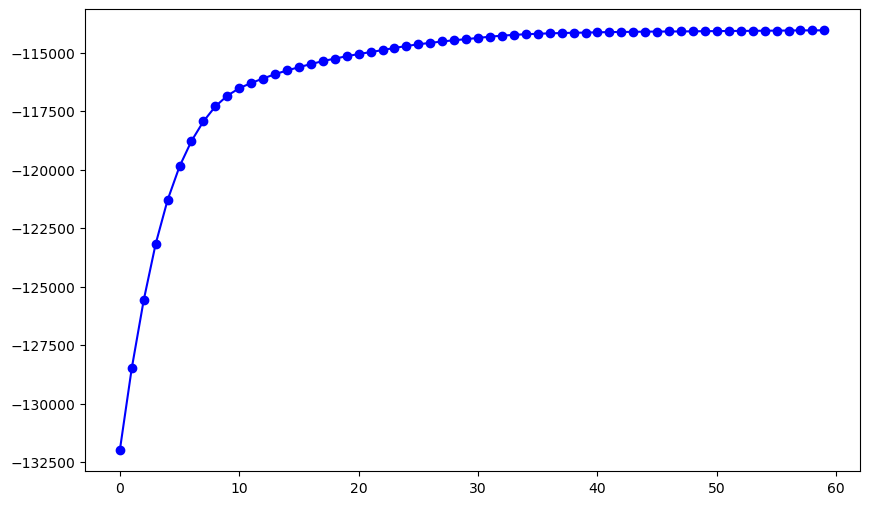

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [10]:
# Assuming 'Y' is the numpy array with your imputed data
# Also assuming 'original_values' is the original DataFrame before you removed 20% of the data
Y= mycebmf.Y_fit
# Extract the original values that were removed (same as before)
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Extract the corresponding imputed values from Y
imputed_values = Y[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Imputed values shape: {imputed_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == imputed_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))
    print(f'RMSE for your custom imputation method: {rmse}')
else:
    print("Error: Shape mismatch between true values and imputed values.")


True values shape: (20000,)
Imputed values shape: (20000,)
RMSE for your custom imputation method: 0.9299150802891628


In [11]:
mycebmf.iter()

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\cEBMF.py:327: RuntimeWarning: divide by zero encountered in power
  s_f = (denominator_f_hat) ** (-0.5)+1e-6


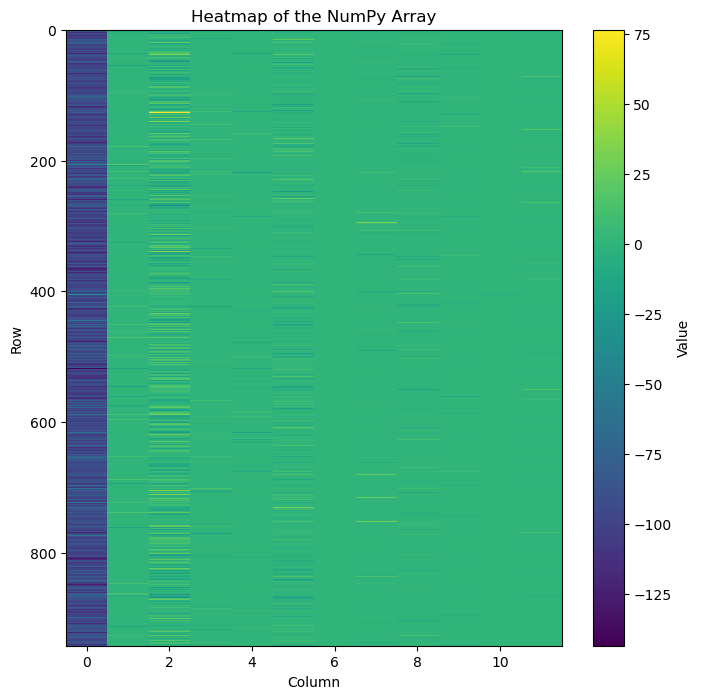

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mycebmf.f is your NumPy array
plt.figure(figsize=(8, 8))  # You can adjust the size here
plt.imshow(mycebmf.L, cmap='viridis', aspect='auto', interpolation='nearest')  # 'aspect' set to auto for better scaling
plt.colorbar(label="Value")
plt.title("Heatmap of the NumPy Array")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


In [13]:
k=1
mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
 
betahat   =lhat
sebetahat =s_l 
prior     = mycebmf.prior_L
verbose=False
mult=np.sqrt(2) 



np.isinf (lhat ).any()
sebetahat 

array([1.11596575, 2.13650668, 2.45735172, 2.73405065, 1.42122776,
       1.28144295, 0.95526508, 2.02586097, 3.18678964, 1.47312219,
       1.41182599, 3.10825605, 0.73931927, 2.04702674, 1.62304265,
       1.68972702, 3.39455159, 1.18846619, 3.44535366, 3.02422749,
       1.33771993, 1.89920379, 1.6485989 , 1.90468528, 2.17458337,
       1.62805422, 3.85336708, 2.27024147, 2.41382534, 2.43076275,
       3.24703768, 3.28062558, 2.65136857, 3.34968412, 2.28623583,
       2.42110268, 2.61469016, 1.56206453, 2.58522243, 2.3066263 ,
       2.69169399, 1.36849283, 1.17064568, 1.50697079, 3.38610629,
       2.27612637, 2.73640347, 2.16818288, 1.16852226, 3.51048911,
       3.96085881, 2.55730337, 4.28768671, 2.17163851, 4.33596662,
       1.41228586, 1.64536116, 1.42355594, 0.93110968, 1.47854414,
       2.37027233, 1.31902009, 1.77023314, 1.39023725, 2.11737257,
       3.26710801, 3.5747562 , 3.11763246, 2.09112562, 1.68515588,
       3.25012729, 2.12126424, 2.73052277, 2.20335242, 1.81601

In [14]:
betahat

array([-1.49736259e+00, -1.03396781e+00, -5.50401572e+00,  5.22154309e+00,
        1.88706533e+00, -6.30602247e+00, -1.65981111e+00,  9.85543141e-02,
       -1.84462678e+00, -3.53415946e-01,  2.16759277e+00, -1.90813234e+00,
        2.37560960e-01, -5.38890021e-01,  8.18946501e-01, -2.34793646e+00,
        1.33999084e+00,  8.07242595e-01, -7.14773734e-01,  2.66351641e+00,
        6.90542925e-01, -1.25661279e+01, -3.71009753e-01, -2.28549019e+00,
        5.55300702e+00,  1.73976576e+00,  6.13087856e-02, -4.63701069e-01,
        2.86658095e+00,  1.31217473e+00, -3.14197614e+00, -2.88687700e+00,
       -1.77805625e+00, -1.47411123e+00,  1.88891664e+00, -9.23242947e+00,
        1.72063901e+00,  4.56702408e-01, -4.96419924e-01,  3.62290417e-01,
       -1.09511464e+00, -1.38707200e+00,  5.07790330e+00, -1.41971578e+00,
       -3.11249622e-01,  8.49648185e-01,  1.17453635e+00, -6.97466699e-01,
       -6.62723206e-01, -4.29174934e+00, -1.33802423e+00, -1.66979802e+00,
        1.04605422e+00,  

In [15]:


ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
print(ash_obj.post_mean)
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2

[-4.04402700e-02 -2.30527519e-02 -1.04609376e+00  6.07947308e-01
  6.14092816e-02 -6.18781515e+00 -6.94754384e-02  1.89059991e-03
 -5.74680799e-02 -5.32195483e-03  9.25144975e-02 -5.95885851e-02
  2.15769033e-03 -1.07546878e-02  1.46873472e-02 -9.51066342e-02
  4.01845737e-02  1.22589180e-02 -2.06139596e-02  9.72224826e-02
  1.05714035e-02 -1.20865365e+01 -6.12698038e-03 -8.11200302e-02
  1.70690562e+00  4.74053037e-02  1.85169669e-03 -9.93127041e-03
  1.19511383e-01  3.32074322e-02 -1.28098188e-01 -1.10483083e-01
 -5.15076059e-02 -4.45659357e-02  5.45226688e-02 -8.28846017e+00
  4.89836952e-02  7.32387377e-03 -1.17285497e-02  7.79633782e-03
 -2.82414263e-02 -3.09641499e-02  4.96038653e+00 -3.21942366e-02
 -8.75108398e-03  1.90690244e-02  3.09086883e-02 -1.48147375e-02
 -9.29500052e-03 -2.29767546e-01 -4.29553555e-02 -4.66390517e-02
  3.41062816e-02  1.43966026e-02 -1.28990133e+01 -4.61300284e-02
  1.09511069e-02  1.87239852e-01  1.81475660e-03  2.27200409e-02
  4.17589356e-03 -1.02976

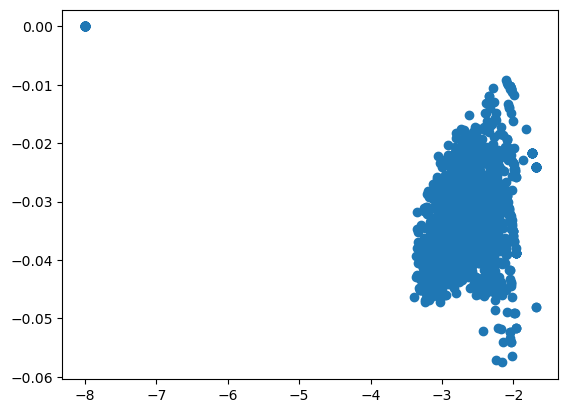

In [16]:
k=0
mycebmf.cal_partial_residuals(k=k)

fhat , s_f  = compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
plt.scatter(np.log10(s_f), fhat)
betahat=fhat
sebetahat=s_f

In [17]:
scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=mult)
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi_logL(  logL =L,
                                 penalty=10,
                                 verbose=verbose)  
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))

In [18]:
penalty=10

n, K = L.shape  # n: number of data points, K: number of components
pi =np.exp( - np.arange(0,K) )/ np.sum( np.exp( - np.arange(0,K) ))  # Initialize pi uniformly
vec_pen= np.ones_like(pi)
vec_pen[0]= penalty
pi

optimal_pi=pi

log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat, sebetahat,
                                 log_pi=log_pi, 
                                 scale=scale)

out.post_mean

array([1.40674751e-08, 2.40404378e-07, 5.69422892e-07, ...,
       2.78956987e-04, 2.34788886e-04, 2.18686284e-04])

In [19]:
assignment = np.exp(log_pi)
assignment = assignment / assignment.sum(axis=1, keepdims=True)
mu = 0
post_assign = np.zeros((betahat.shape[0], scale.shape[0]))
    
for i in range(betahat.shape[0]):
        post_assign[i,] = wpost_exp(x=betahat[i],
                                    s=sebetahat[i], 
                                    w=assignment[i,],
                                    scale=scale) 
    
post_mean = np.zeros(betahat.shape[0])
post_mean2 = np.zeros(betahat.shape[0])



[0.00000000e+00 8.42979009e-04 1.19215235e-03 1.68595802e-03
 2.38430469e-03 3.37191604e-03 4.76860939e-03 6.74383207e-03
 9.53721878e-03 1.34876641e-02 1.90744376e-02 2.69753283e-02
 3.81488751e-02 5.39506566e-02 7.62977502e-02 1.07901313e-01
 1.52595500e-01 2.15802626e-01 3.05191001e-01 4.31605253e-01
 6.10382002e-01 8.63210505e-01]
-477218.0357190247
[0.0004602  0.00086399 0.00104684 ... 0.01009933 0.01032138 0.00909843]


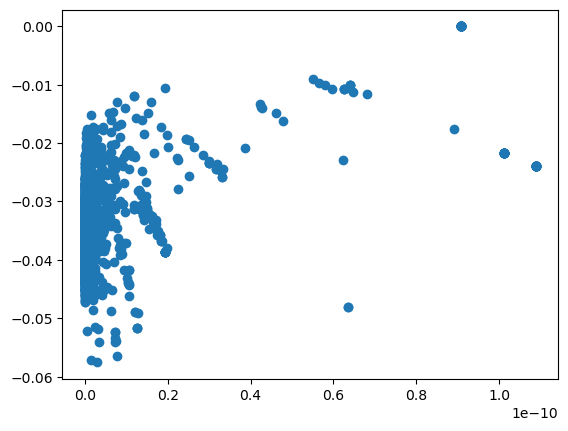

In [20]:


ash_obj = ash(betahat   =10*fhat,
                      sebetahat =s_f+1e-3 ,
                      prior     = "exp",
                      verbose=False
                      )
print(ash_obj.scale)

mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
print(ash_obj.log_lik)

print(s_f)
 
plt.scatter(ash_obj.post_mean, fhat)

In [21]:
ash_obj.pi

array([9.99999737e-01, 2.39607107e-07, 2.11516360e-08, 1.71452814e-09,
       1.30934045e-10, 1.20635582e-11, 3.12221843e-12, 1.92294475e-12,
       1.37468603e-12, 9.90187760e-13, 7.10367175e-13, 5.07673541e-13,
       3.61756488e-13, 2.57223246e-13, 1.82608117e-13, 1.29489953e-13,
       9.17481479e-14, 6.49687282e-14, 4.59866063e-14, 3.25408929e-14,
       2.30216004e-14, 1.62846279e-14])

In [22]:
betahat   =fhat 
sebetahat =s_f  +1e-7
prior     = mycebmf.prior_F 

In [23]:
scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))

L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True)  
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat, sebetahat,
                                 log_pi=log_pi, 
                                 scale=scale)

Converged after 12 iterations.


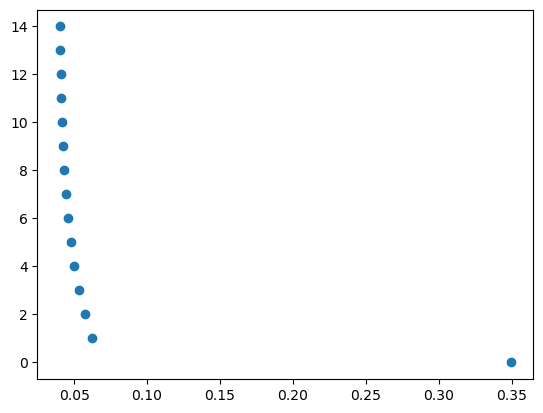

In [24]:
optimal_pi
plt.scatter(optimal_pi, range(optimal_pi.shape[0]))





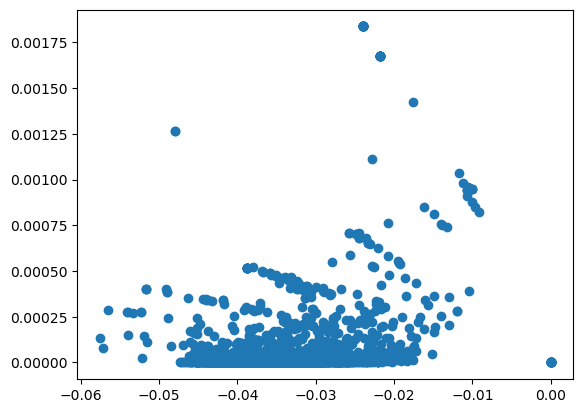

In [25]:
plt.scatter(fhat,out.post_mean )

In [26]:
L

array([[-3.86527410e+03, -3.87048553e+03, -3.87083051e+03, ...,
        -3.87429250e+03, -3.87463903e+03, -3.87498558e+03],
       [-7.60141369e+02, -7.63930908e+02, -7.64270842e+02, ...,
        -7.67720877e+02, -7.68067301e+02, -7.68413769e+02],
       [-4.54913178e+02, -4.58269570e+02, -4.58605891e+02, ...,
        -4.62047231e+02, -4.62393572e+02, -4.62739980e+02],
       ...,
       [ 9.41043689e-01,  7.35581908e-01,  6.59115612e-01, ...,
        -1.57241595e+00, -1.89710286e+00, -2.22794931e+00],
       [-2.71181852e+00, -3.00155699e+00, -3.10234520e+00, ...,
        -5.53935301e+00, -5.86934641e+00, -6.20404334e+00],
       [-2.59835123e+00, -2.92210776e+00, -3.03246897e+00, ...,
        -5.54615943e+00, -5.87805214e+00, -6.21412530e+00]])

In [27]:
scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=penalty,
                                 verbose=verbose)  
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat, sebetahat,
                                 log_pi=log_pi, 
                                 scale=scale)

In [28]:
sigmaamax  

NameError: name 'sigmaamax' is not defined

In [29]:
s_f=1e-8+s_f

In [ ]:
betahat   =lhat
sebetahat =s_l 
prior     = mycebmf.prior_L
verbose=False
mult=np.sqrt(2)

plt.scatter(betahat, sebetahat)

In [ ]:
np.sqrt(1e-32)
 
plt.scatter(betahat,np.log(sebetahat))
plt.axvline(x=0, color='red', linestyle='--')  # Add a horizontal line at y=0

In [ ]:
ash_obj.post_mean

In [ ]:
plt.scatter(s_f, fhat)

In [ ]:
res= ash(betahat=fhat, sebetahat=s_f, prior="exp")

In [ ]:
plt.hist(np.log10(s_f))